# Forecasting with ARIMA

# Temperature Forecast in Delhi

### Problem Statement


The mean temperature in Delhi depends on many factors like the season, recent temperatures, and so on. For people who want to spend their holidays in Delhi and North India, it is helpful to know the mean temperature for the coming months.

Adrian, a climatologist, is tracking weather data and using that data to make forecasts.

He used historical data for several weather variables - atmospheric pressure, temperature, dew point, and winds to train his systems to make predictions about future weather patterns based on past data.

To improve his existing model, he is now considering using time series algorithms such as ARIMA and SARIMA in consecutive order. This will enable him to determine the most accurate model to forecast the mean temperature in the coming months.

Help him improve his model using the ARIMA and SARIMA models by performing the following tasks provided in the subsequent slides.

Click train and test to download training and testing datasets to accomplish these tasks.

### Objective 

Finding the best model for forecasting

### Importing required liabraries

In [93]:
import pandas as pd                                            # loading the dataset      
import numpy as np                                             # Working with arrays
import matplotlib.pyplot as plt                                # Visualization
from statsmodels.tsa.seasonal import seasonal_decompose        # splitting time series data into several components trend, seasonal and residual
from statsmodels.tsa.stattools import adfuller,acf,pacf        # adfuller to check stationarity of data, acf : auto correlation function, pacf : partial auto correlation function
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf   # for plotting actocorrelation & partial autocorrelation plot
from statsmodels.tsa.arima.model import ARIMA                  # for building ARIMA model
from pmdarima.arima import auto_arima                          # auto ARIMA (to help in the selection of p,d,q)
from sklearn.metrics import mean_squared_error                 # model evaluation
from statsmodels.tsa.statespace.sarimax import SARIMAX         # for building SARIMAX model

import warnings                              
warnings.filterwarnings('ignore')                              # filtering warnings

## Task - 1: Data Preparation

### 1. Load the dataset into a Pandas data frame (train and test).

In [97]:
# Loading the data
# parse_date():  convince pandas to turn things into real datetime types

train_df = pd.read_csv(r"C:\Users\Admin\Desktop\Level -1\C1\Repository\DS3_C1_S3_DailyDelhiClimateTrain_Data_Practice.csv",parse_dates=['date'],index_col='date')

test_df = pd.read_csv(r"C:\Users\Admin\Desktop\Level -1\C1\Repository\DS3_C1_S3_DailyDelhiClimateTest_Data_Practice.csv",parse_dates=['date'],index_col='date')

df = pd.concat([train_df,test_df])
# taking the relavant column only for forecast
df1 = df[['meantemp']]

# Previewing the data
df1.head()

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000


### 2. Perform some visual inspections of the data.

<AxesSubplot:xlabel='date'>

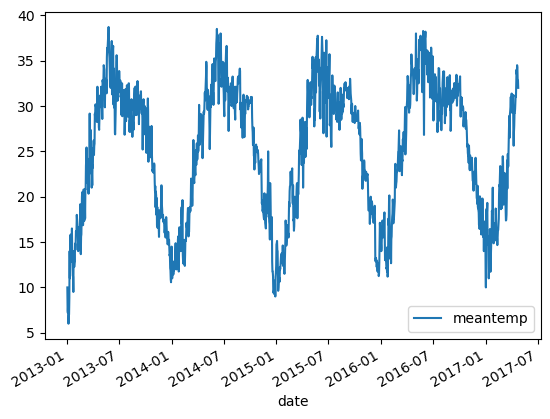

In [48]:
# Data Visualization
df1['meantemp'].plot()

### 3. Sample the data with respect to 7 days.

In [98]:
# Resampling the data monthly
resample = df1.resample('W').mean()
resample.head()

,meantemp
date,
2013-01-06,7.705556
2013-01-13,12.343537
2013-01-20,13.642857
2013-01-27,12.329592
2013-02-03,15.736905


<AxesSubplot:xlabel='date'>

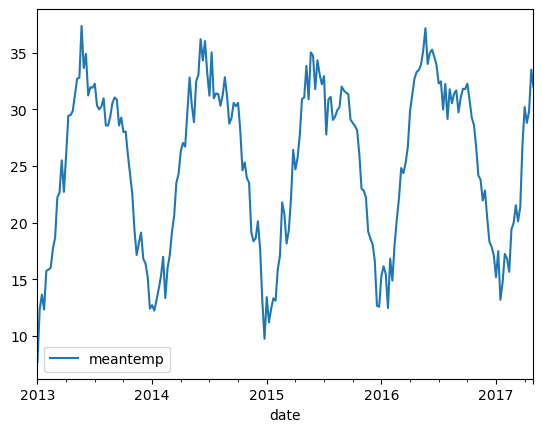

In [99]:
# Data Visualization
resample.plot()

### 4. Split the data into train and test parts into a 70:30 ratio.

In [102]:
# splitting the data into train and test

ss = int(0.7 * len(df))
train = resample.iloc[70:]
test = resample.iloc[:70]
print("train = {}, test = {}".format(len(train), len(test)))

train = 156, test = 70


### 5. Check for stationarity.

In [104]:
# ADF test to determine data stationarity

def checkstationary(data):
    pval = adfuller(data)[1]
    if pval<0.05:
        msg = 'p-value - {}. Data is Stationary'.format(pval)
    else:
        msg = 'p-value - {}. Data is not Stationary'.format(pval)
    return msg

In [105]:
# checking if the data is stationary
checkstationary(resample)

'p-value - 5.224837272985239e-06. Data is Stationary'

### 6. Plot ACF and PACF.

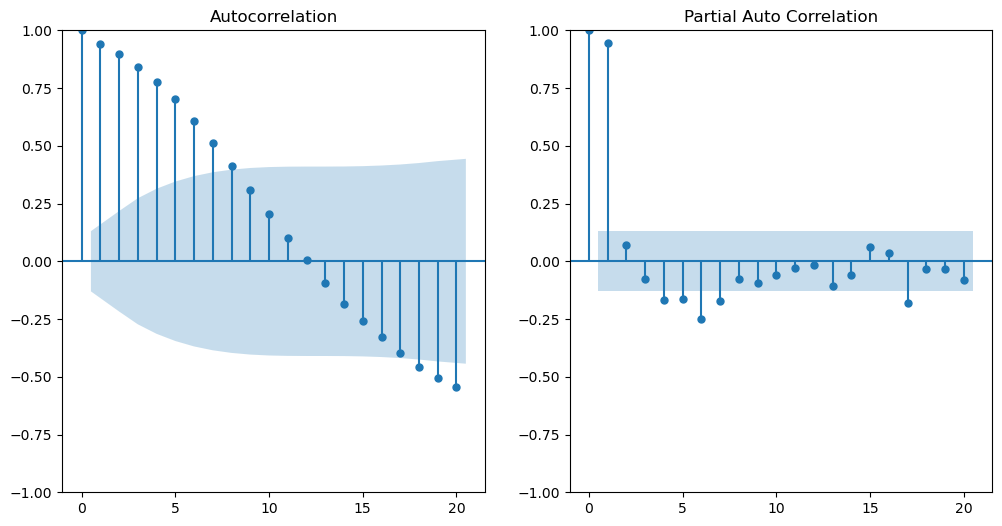

Interpretation : Significant Lag values are p : 10 and q : 6


In [111]:
# ACF and PACF plots
ROWS = 1; COLS = 2
fig,ax = plt.subplots(ROWS,COLS,figsize=(12,6))
plot_acf(resample, lags=20, ax=ax[0]);
plt.title("Auto Correlation")

plot_pacf(resample, lags=20, ax=ax[1]);
plt.title("Partial Auto Correlation")

plt.show()

print("Interpretation : Significant Lag values are p : 10 and q : 6")

## Task 2: Build the ARIMA Model 

### 1. Define functions to build the ARIMA model and predict temperatures.

In [113]:
# auto ARIMA (to help in the selection of p,d,q)
m1 = auto_arima(resample,start_p=0,max_p=10, start_q=0, end_q=8, seasonal=False, trace=True)
print(m1.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2120.297, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1838.535, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=986.469, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=987.730, Time=0.26 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=985.438, Time=0.29 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1624.799, Time=0.23 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=989.846, Time=0.55 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=984.261, Time=0.27 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=1487.781, Time=0.36 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=958.010, Time=0.32 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=956.417, Time=0.51 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=988.272, Time=0.53 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=953.904, Time=0.61 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=990.0

### 2. Build the ARIMA model.

In [88]:
# p=4, q=3 from autoarima
# d = 0 (since data is stationary)

p=4;q=3;d=0;m=12

m2=ARIMA(sales_data, order=(p,d,q)).fit()

# model summary
print(m2.summary())

p=4; d=0; q=3
m = ARIMA(df1['diff1'].dropna(), order=(p,d,q)).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### 3. Summarize the model.

In [89]:
print(m.summary())

                               SARIMAX Results                                
Dep. Variable:                  diff1   No. Observations:                 1575
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2993.599
Date:                Sun, 17 Sep 2023   AIC                           5995.198
Time:                        12:31:55   BIC                           6016.646
Sample:                             0   HQIC                          6003.169
                               - 1575                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0146      0.020      0.749      0.454      -0.024       0.053
ar.L1          0.5859      0.045     13.115      0.000       0.498       0.673
ma.L1         -0.8074      0.035    -23.038      0.0

In [90]:
start = len(train)
end = len(train)+len(test)-1
predictions = m.predict(start,end,type='levels')
print(predictions)

70     -0.218409
71      0.272822
72      0.041714
73     -0.366448
74      0.559477
          ...   
1571   -0.627422
1572   -0.445154
1573   -0.054272
1574   -0.032224
1575    0.173903
Name: predicted_mean, Length: 1506, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [91]:
actual=[];predicted=[]
for i in len(test):
    actual.append(test[''])

## Task 3: Build the SARIMA Model

### 1. Visualize the decomposed components of the data.

### 2. Build the SARIMA model.

### 3. Forecast the future data using the model. 